<a id="toc"></a>

# <u>Table of Contents</u>
1.) [Imports](#imports)  
2.) [Load data](#load)  
3.) [Quick Overview](#overview)  
&nbsp;&nbsp;&nbsp;&nbsp; 3.1.) [Boring columns](#boring)  
&nbsp;&nbsp;&nbsp;&nbsp; 3.2.) [Missing Values](#nan)  
&nbsp;&nbsp;&nbsp;&nbsp; 3.3.) [Fill in missing values](#fillnan)  
&nbsp;&nbsp;&nbsp;&nbsp; 3.4.) [Correlation Map](#corr)  
4.) [Target varable - ](#target)  
5.) [Categorical columns](#cat)  
&nbsp;&nbsp;&nbsp;&nbsp; 5.1.) [Unique values](#cat_unique)  
&nbsp;&nbsp;&nbsp;&nbsp; 5.2.) [Get dummies](#cat_dummies)  
6.) [Numerical columns](#num)  
7.) [Modeling](#model)  
&nbsp;&nbsp;&nbsp;&nbsp; 7.1.) [Machine learning imports](#ml_imports)  
&nbsp;&nbsp;&nbsp;&nbsp; 7.2.) [Many model evaluation](#model_eval)  
&nbsp;&nbsp;&nbsp;&nbsp; 7.3.) [Ada Boost](#ada_model)  
&nbsp;&nbsp;&nbsp;&nbsp; 7.4.) [Decision Tree](#dtc_model)  
&nbsp;&nbsp;&nbsp;&nbsp; 7.5.) [Extra Trees](#etc_model)  
&nbsp;&nbsp;&nbsp;&nbsp; 7.6.) [Gaussian Naive Bayes](#gnb_model)  
&nbsp;&nbsp;&nbsp;&nbsp; 7.7.) [Gradient Boost](#gbc_model)  
&nbsp;&nbsp;&nbsp;&nbsp; 7.8.) [K Nearest Neighbors](#knn_model)  
&nbsp;&nbsp;&nbsp;&nbsp; 7.9.) [Light Gradient Boost](#lgb_model)  
&nbsp;&nbsp;&nbsp;&nbsp; 7.10.) [Linear Discriminant Analysis](#lin_model)  
&nbsp;&nbsp;&nbsp;&nbsp; 7.11.) [Logistic](#log_model)  
&nbsp;&nbsp;&nbsp;&nbsp; 7.12.) [Multiple Layer Perceptron](#mlp_model)  
&nbsp;&nbsp;&nbsp;&nbsp; 7.13.) [Random Forest Classifier](#rfc_model)  
&nbsp;&nbsp;&nbsp;&nbsp; 7.14.) [SVC](#svc_model)  
&nbsp;&nbsp;&nbsp;&nbsp; 7.15.) [XGB Classifier](#xgb_model)  
&nbsp;&nbsp;&nbsp;&nbsp; 7.16.) [Voting classifier](#vote)  
8.) [Feature Importance](#feat_importance)  

---
<a id="imports"></a>

# [^](#toc) <u>Imports</u>

In [1]:
### Standard imports
import pandas as pd
import numpy as np

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Time keeper
import time

# Datetime library
from datetime import datetime

### Removes warnings from output
import warnings
warnings.filterwarnings('ignore')

### Styling helpers

In [2]:
# A short hand way to plot most bar graphs
def pretty_bar(data, ax, xlabel=None, ylabel=None, title=None, int_text=False):
    
    # Plots the data
    fig = sns.barplot(data.values, data.index, ax=ax)
    
    # Places text for each value in data
    for i, v in enumerate(data.values):
        
        # Decides whether the text should be rounded or left as floats
        if int_text:
            ax.text(0, i, int(v), color='k', fontsize=14)
        else:
            ax.text(0, i, round(v, 3), color='k', fontsize=14)
     
    ### Labels plot
    ylabel != None and fig.set(ylabel=ylabel)
    xlabel != None and fig.set(xlabel=xlabel)
    title != None and fig.set(title=title)

    
### Used to style Python print statements
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

---
<a id="load"></a>

# [^](#toc) <u>Load data</u>

In [3]:
DATA_PATH = ""

# Parses the time values as the data is read
dateparse = lambda x: pd.datetime.strptime(x, "%Y-%m-%d")

# Load data
train = pd.read_csv(DATA_PATH + "train.csv", parse_dates=['date'], date_parser=dateparse)
test  = pd.read_csv(DATA_PATH + "test.csv",  parse_dates=['date'], date_parser=dateparse)

print("Shape of train data:", train.shape, "\n")
print("Shape of test data:" , test.shape,  "\n")

### Categorical columns
cat_columns = [col for col in train.columns if train[col].dtype == object]
print("{}Categorical columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(cat_columns))

### Numerical columns
num_columns = [col for col in train.columns if train[col].dtype != object]
print("{}Numerical columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(num_columns))

train.head()

---
<a id="overview"></a>

# [^](#toc) <u>Quick Overview</u>

### Split into id, target, and predictors

In [6]:
train_y  = train.
train_x  = train.drop([], axis=1)

test_id  = test.
test_x   = test.drop([], axis=1)

### Combine predictors
full = pd.concat([train_x, test_x])
train_N = len(train_x)

<a id="boring"></a>

### [^](#toc) Boring columns

In [4]:
for col in train_x.columns:
    unique_vals = train_x[col].unique()
    if len(unique_vals) < 3:
        print(col, unique_vals)

<a id="nan"></a>

### [^](#toc) Missing values

In [5]:
temp = train_x.isnull().sum()
temp[temp > 0]

#### Drop all unneeded columns

In [6]:
drop_columns = [col for col in train_x.columns if all(train_x[col].isnull())]
train_x = train_x.drop(drop_columns, axis=1)

# Look at missing values again
temp = train_x.isnull().sum()
temp[temp > 0]

<a id="fillnan"></a>

### [^](#toc) Fill in missing values

In [11]:
# Put "NaN" for all categorical missing values
categorical_cols = [col for col in train_x.columns if train_x[col].dtype == object]
for col in categorical_cols:
    train_x[col] = train_x[col].fillna("NaN")

# Put median for missing values in numeric columns and create flag for missing values
numerical_cols = [col for col in train_x.columns if any(train_x[col].isnull()) and train_x[col].dtype != object]
for col in numerical_cols:
    train_x[col + "_nan"] = train_x[col].map(lambda x: 1 if np.isnan(x) else 0)
    train_x[col]          = train_x[col].fillna(train_x[col].median())
    
sum(train_x.isnull().sum())

0

<a id="corr"></a>

### [^](#toc) Correlation Map

In [7]:
f, ax = plt.subplots(figsize=(15, 15))

cols = [col for col in train_x.columns if "_nan" not in col]
_ = sns.heatmap(train_x[cols].corr(), vmax=.8, cmap="coolwarm")

---
<a id="target"></a>

# [^](#toc) <u>Target varable</u>

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
temp = train_y.value_counts()
pretty_bar(temp, ax, title="", xlabel="Counts", ylabel="")

---
<a id="cat"></a>

# [^](#toc) <u>Categorical columns</u>

<a id="cat_unique"></a>

### [^](#toc) Unique values

In [9]:
cat_cols = [col for col in train_x.columns if train_x[col].dtype == object]
for col in cat_cols:
    print(col, len(train_x[col].unique()))

<a id="cat_dummies"></a>

### [^](#toc) Get dummies

To use the categorical columns for modeling, I'm going to create dummy variables for all the categorical column values

In [10]:
train_x = pd.get_dummies(train_x)
train_x.head()

---
<a id="num"></a>

# [^](#toc) <u>Numerical columns</u>

In [ ]:
### Separate into train and test
train_x = full[:train_N]
test_x  = full[train_N:]

---
<a id="model"></a>

# [^](#toc) Modeling

<a id="ml_imports"></a>

### [^](#toc) Machine learning imports

In [23]:
### Massive amounts of model imports

# Classifiers
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Helpers
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

kfold = StratifiedKFold()

def score_model(model):
    score = cross_val_score(model, train_x, train_y, cv=kfold, n_jobs=1, scoring="accuracy")
    print(score)
    print("\nAverage is ...")
    print(sum(score) / len(score))

<a id="model_eval"></a>

### [^](#toc) Many model evaluation

This just gives an idea of what model will be the best performer.

In [ ]:
# Modeling step Test differents algorithms 
classifiers = [
                AdaBoostClassifier(
                    DecisionTreeClassifier(random_state = 17),
                    random_state = 17, learning_rate = 0.1
                ),
                DecisionTreeClassifier(random_state = 17),
                ExtraTreesClassifier(random_state = 17),
                GaussianNB(random_state = 17),
    
                GradientBoostingClassifier(random_state=17),
                KNeighborsClassifier(),
                LGBMClassifier(),
                LinearDiscriminantAnalysis(),
    
                LogisticRegression(random_state = 17),
                MLPClassifier(random_state = 17),
                RandomForestClassifier(random_state = 17),
                SVC(random_state=17),
    
                XGBClassifier()
              ]

cv_results = [cross_val_score(classifier, train_x, y=train_y, scoring="accuracy", cv=kfold) for classifier in classifiers]

cv_means = [cv_result.mean() for cv_result in cv_results]
cv_std = [cv_result.std() for cv_result in cv_results]

cv_results = pd.DataFrame({
                        "CrossValMeans":cv_means,
                        "CrossValerrors": cv_std,
                        "Algorithm":[
                            "AdaBoost",
                            "DecisionTree",
                            "ExtraTrees",
                            "GaussianNaiveBayes",
                            
                            "GradientBoosting",
                            "KNeighboors",
                            "LGBM",
                            "LinearDiscriminantAnalysis",
                            
                            "LogisticRegression",
                            "MultipleLayerPerceptron",
                            "RandomForest",
                            "SVC",
                            
                            "XGB"
                        ]})

sns.barplot("CrossValMeans","Algorithm", data=cv_results, palette="Set3", orient="h", **{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
_ = plt.title("Cross validation scores")

<a id="ada_model"></a>

### [^](#toc) Ada Boost Classifier

In [ ]:
ada_model = AdaBoostClassifier(
                    DecisionTreeClassifier(random_state = 17),
                    random_state = 17, learning_rate = 0.1
                )

### Training
start = time.time()
ada_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(ada_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="dtc_model"></a>

### [^](#toc) Deciscion Tree Classifier

In [ ]:
dtc_model = DecisionTreeClassifier(random_state = 17)

### Training
start = time.time()
dtc_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(dtc_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="etc_model"></a>

### [^](#toc) Extra Trees Classifer

In [ ]:
etc_model = ExtraTreesClassifier(random_state = 17)

### Training
start = time.time()
etc_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(etc_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="gnb_model"></a>

### [^](#toc) Gaussian Naive Bayes

In [ ]:
gnb_model = GaussianNB(random_state=17)

### Training
start = time.time()
gnb_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(gnb_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="gbc_model"></a>

### [^](#toc) Gradient Boosting Classifier

In [ ]:
gbc_model = GradientBoostingClassifier(random_state=17)

### Training
start = time.time()
gbc_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(gbc_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="knn_model"></a>

### [^](#toc) K Nearest Neighbors

In [ ]:
knn_model = KNeighborsClassifier()

### Training
start = time.time()
knn_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(knn_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="lgb_model"></a>

### [^](#toc) Light Gradient Boost

In [2]:
lgb_model = LGBMClassifier()

### Training
start = time.time()
lgb_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(lgb_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="lin_model"></a>

### [^](#toc) Linear Discriminant Analysis

In [1]:
lin_model = LinearDiscriminantAnalysis()

### Training
start = time.time()
lin_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(lin_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="log_model"></a>

### [^](#toc) Logistic

In [ ]:
log_model = LogisticRegression(random_state = 17)

### Training
start = time.time()
log_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(log_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="mlp_model"></a>

### [^](#toc) Multiple Layer Perceptron

In [ ]:
mlp_model = MLPClassifier(random_state = 17)

### Training
start = time.time()
mlp_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
mlp_model(lin_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="rfc_model"></a>

### [^](#toc) Random Forest Classifier

In [ ]:
rfc_model = RandomForestClassifier(random_state = 17)

### Training
start = time.time()
rfc_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(rfc_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="svc_model"></a>

### [^](#toc) SVC

In [ ]:
svc_model = SVC()

### Training
start = time.time()
svc_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(svc_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="xgb_model"></a>

### [^](#toc) XGB Classifier

In [ ]:
xgb_model = XGBClassifier()

### Training
start = time.time()
xgb_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(xgb_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

<a id="vote"></a>

### [^](#toc) Voting classifier

In [ ]:
print("Building...")
final_model = VotingClassifier(estimators=[
                                        ("ADA", ada_model),
                                        ("DTC", dtc_model),
                                        ("ETC", etc_model),
                                        ("GBC", gbc_model),
                                        ("KNN", knn_model),
                                        ("LGB", lgb_model),
                                        ("LIN", lin_model),
                                        ("LOG", log_model),
                                        ("MLP", mlp_model),
                                        ("RFC", rfc_model),
                                        ("SVC", svc_model),
                                        ("XGB", xgb_model)
                                      ], voting='soft')
print("Built.")

### Training
start = time.time()
final_model.fit(train_x, train_y)
print("Training took {} seconds".format(round(time.time() - start)))

### Scoring
start = time.time()
score_model(final_model)
print("\nScoring took {} seconds".format(round(time.time() - start)))

---
<a id="feat_importance"></a>

# [^](#toc) <u>Feature Importance</u>

Runs an Extra Trees Classifier on a sample of the data and determines the data's most important features.

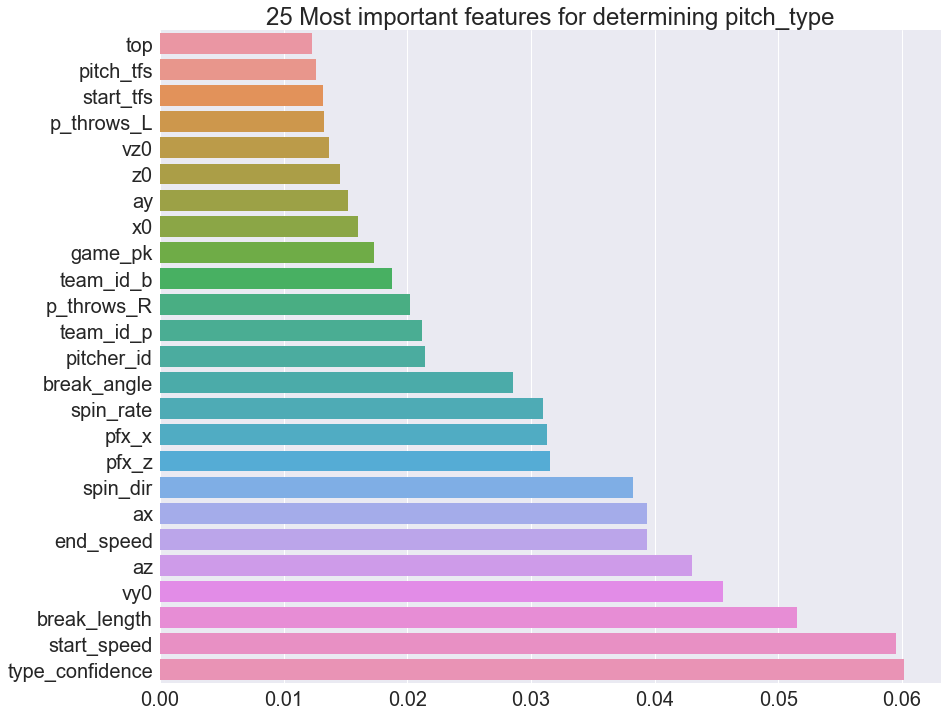

In [38]:
# Setup Extra Trees model
et_model = ExtraTreesClassifier()
et_model.fit(train_x[:10000], train_y[:10000])

# Get important features
x, y = (list(x) for x in zip(*sorted(zip(et_model.feature_importances_, train_x.columns), 
                                                            reverse = False)))

### Styling
sns.set(font_scale=2)
plt.figure(figsize=(14, 12))
plt.title("25 Most important features for model")

# Plot important features
_ = sns.barplot(x[-25:], y[-25:])